### Load test error

In [8]:
exp='mnist'
time_stamp = "debug"#"10-19-17-23-29-41"
models =["LSTM","MLSTM","TLSTM"] #'phased_lstm']#
hz_list= [16]
ts_list =[10] 
lr_list =[3]



import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(ts, model):    
    data_path = "../log/"+exp+"/"+time_stamp+"/"+model+"/"+ "ts-"+ str(ts) +"/"
    f_pred= "predict.npy"
    f_err = "config.out"
    try:
        pred =  np.load(data_path+f_pred )
        with open(data_path+""+f_err,'r') as fstream:
            config = read_config(fstream)
        print(data_path)
        return config, pred
    except FileNotFoundError:
        return None, None

errs = np.ones((len(ts_list),len(models), 2))
i=0
for ts in ts_list:
    j=0
    for model in models: 
        try:
            config, pred = load_log(ts, model)
            print('train error:',config['train_error'],'valid err:',config['valid_error'],'test err:',config['test_error'])
            errs[i,j,k] =  config['test_error']
        except:
            pass
        j +=1
    i +=1


../log/mnist/debug/TLSTM/ts-10/
train error: 0.18002 valid err: 0.234417 test err: 0.254093


## Load test true/pred

In [18]:
def get_pred(model):
    data_path = "../log/"+exp+"/"+time_stamp+"/"+model+"/"+ "ts-"+ str(ts) +"/"
    try:
        true, pred = np.load(data_path+'predict.npy')
        print(data_path)
    except:
        pass
    return true,pred

tlstm_true, tlstm_pred = get_pred('TLSTM')
print(tlstm_true.shape)

../log/mnist/debug/TLSTM/ts-10/
(80, 10, 1024)


## Display image

In [25]:
import matplotlib.pyplot as plt
from six.moves import xrange 
%matplotlib inline
def draw_seq(data, image_size, case_id=0, fig=1):
    data = data[case_id, :].reshape(-1, image_size, image_size)
    seq_length = data.shape[0]
    num_rows = 1

    plt.figure(2*fig, figsize=(10, 1))
    plt.clf()
    for i in xrange(seq_length):
        plt.subplot(num_rows,seq_length, i+1)
        plt.imshow(data[i, :, :], cmap=plt.cm.gray, interpolation="nearest")
        plt.axis('off')
    plt.draw()
    
image_size = 32

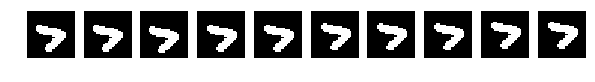

In [26]:
draw_seq(tlstm_true, image_size)

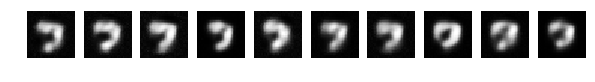

In [27]:
draw_seq(tlstm_pred, image_size)